In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [105]:
# Loading the data
data=pd.read_csv('data_for_lr.csv')

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [107]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [108]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [109]:
data=data.dropna()

In [110]:
print('shape of the data is :',data.shape)

shape of the data is : (699, 2)


## spliting data

In [111]:
train_input=np.array(data.x[0:500])

In [112]:
train_input.shape

(500,)

In [113]:
train_input

array([ 24.,  50.,  15.,  38.,  87.,  36.,  12.,  81.,  25.,   5.,  16.,
        16.,  24.,  39.,  54.,  60.,  26.,  73.,  29.,  31.,  68.,  87.,
        58.,  54.,  84.,  58.,  49.,  20.,  90.,  48.,   4.,  25.,  42.,
         0.,  60.,  93.,  39.,   7.,  21.,  68.,  84.,   0.,  58.,  19.,
        36.,  19.,  59.,  51.,  19.,  33.,  85.,  44.,   5.,  59.,  14.,
         9.,  75.,  69.,  10.,  17.,  58.,  74.,  21.,  51.,  19.,  50.,
        24.,   0.,  12.,  75.,  21.,  64.,   5.,  58.,  32.,  41.,   7.,
         4.,   5.,  49.,  90.,   3.,  11.,  32.,  83.,  25.,  83.,  26.,
        76.,  95.,  53.,  77.,  42.,  25.,  54.,  55.,   0.,  73.,  35.,
        86.,  90.,  13.,  46.,  46.,  32.,   8.,  71.,  28.,  24.,  56.,
        49.,  79.,  90.,  89.,  41.,  27.,  58.,  26.,  31.,  70.,  71.,
        39.,   7.,  48.,  56.,  45.,  41.,   3.,  37.,  24.,  68.,  47.,
        27.,  68.,  74.,  95.,  79.,  21.,  95.,  54.,  56.,  80.,  26.,
        25.,   8.,  95.,  94.,  54.,   7.,  99.,  3

train_input.reshape(500,1)

In [114]:
train_output=np.array(data.y[0:500]).reshape(500,1)

In [115]:
test_input=np.array(data.x[500:700]).reshape(199,1)
test_output=np.array(data.y[500:699]).reshape(199,1)

In [116]:
# train_input = (train_input - np.mean(train_input)) / np.std(train_input)
# train_output = (train_output - np.mean(train_output)) / np.std(train_output)


# <font color="RED">LINEAR REGRESSION</font>

## FORWARD PROPAGATION


F(X)=mx+c

In [117]:
def forward_propagation(train_input,parameters):
    m=parameters["m"]
    c=parameters["c"]
    predictions=np.multiply(m,train_input)+c
    #mx+c
    return predictions

    

# cost function
summation(1/2n*(y-f(x)**2)

In [118]:
def cost_funtion(predictions,train_output):
    cost=np.mean((train_output-predictions)**2)*0.5
    return cost

# gradient descent for backward propagation

df=summ(f(x)-y)/n

dm=df*x

dc=df*1

In [119]:
def backward_propagation(train_input, prediction, train_output):
    derivatives = dict()
    error = prediction - train_output  # Difference between prediction and true values
    dm = np.mean(error * train_input)  # Correct gradient for slope
    dc = np.mean(error)  # Correct gradient for intercept

    derivatives["dm"] = dm
    derivatives["dc"] = dc
    return derivatives


In [120]:
def backward_propagation(train_input, prediction, train_output):
    error = prediction - train_output  # Compute error
    dm = np.mean(error * train_input)  # Partial derivative w.r.t 'm'
    dc = np.mean(error)  # Partial derivative w.r.t 'c'
    return {"dm": dm, "dc": dc}


In [121]:
# def backward_propagation(train_input,prediction,train_output):
#     derivatives=dict()
#     df=np.mean(prediction-train_output)
#     dm=np.multiply(df,train_input)
#     dc=(df)
#     derivatives["dm"]=dm
#     derivatives["dc"]=dc

#     return derivatives
    

# update parameters
m=m-learning_rate(dm)

c=c-learning_rate(dc)

In [122]:
def update_parameters(parameters,derivatives,learning_rate):
    parameters["m"]=parameters["m"]-learning_rate*derivatives["dm"]
    parameters["c"]=parameters["c"]-learning_rate*derivatives["dc"]

    return parameters
    
    

## part 2
# MODEL TRAINING


In [123]:
def train(train_input,train_output,learning_rate,iters):
     #random paramters
    parameters=dict()
    parameters["m"]=np.random.uniform(0,1)
    parameters["c"]=np.random.uniform(0,1)
    plt.figure()
    loss=list()
    

    for i in range(iters):
        # forward propagation
        predictions=forward_propagation(train_input,parameters)
        #cost
        cost=cost_funtion(predictions,train_output)
        loss.append(cost)
        print(f"iterations={i+1},loss={cost}")
        #plot
        fig,ax=plt.subplots()
        ax.plot(train_input,train_output,"+",label="original input")
        
        ax.plot(train_input,predictions,"*",label="training")
        
        legend=plt.legend()
        plt.plot(train_input,train_output,"+",label="original input")
        plt.plot(train_input,predictions,"*",label="training")
        legend=ax.legend
        plt.show()
        
        #backward propagation
        derivatives = backward_propagation(train_input, train_output,predictions)  


        #update the parameters
        parameters=update_parameters(parameters,derivatives,learning_rate)
        if i % 5 == 0:
            fig, ax = plt.subplots()
            ax.plot(train_input, train_output, "+", label="Original Data")
            ax.plot(train_input, predictions, "*", label="Training Data")
            plt.legend()
            plt.show()

    return parameters, loss
    

## training

In [124]:
# import numpy as np
# import matplotlib.pyplot as plt

# def train(train_input, train_output, learning_rate, iters):
#     # Random parameter initialization (small values for stability)
#     parameters = {
#         "m": np.random.normal(0, 0.1),
#         "c": np.random.normal(0, 0.1)
#     }
#     loss = []

#     for i in range(iters):
#         # Forward propagation
#         predictions = forward_propagation(train_input, parameters)

#         # Compute cost
#         cost = cost_funtion(predictions, train_output)
#         loss.append(cost)
#         print(f"Iteration {i+1}, Loss: {cost}")

#         # Backward propagation
#         derivatives = backward_propagation(train_input, predictions, train_output)  #  Correct order

#         # Update parameters
#         parameters = update_parameters(parameters, derivatives, learning_rate)

#         # Plot every 5 iterations
#         if i % 5 == 0:
#             fig, ax = plt.subplots()
#             ax.plot(train_input, train_output, "+", label="Original Data")
#             ax.plot(train_input, predictions, "*", label="Training Data")
#             plt.legend()
#             plt.show()

#     return parameters, loss


# again

iterations=1,loss=995.9159651020744


<Figure size 640x480 with 0 Axes>

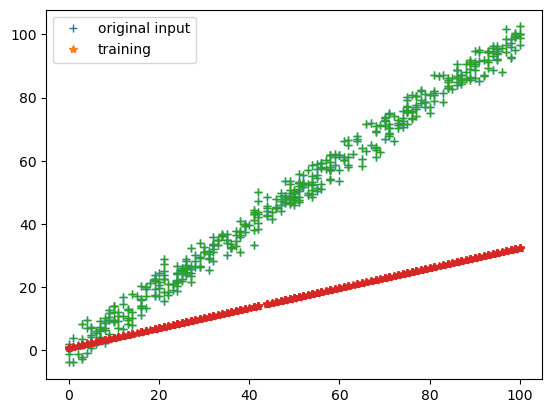

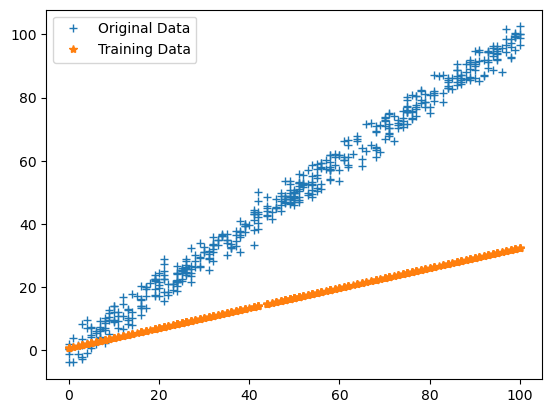

iterations=2,loss=1212.8486627830707


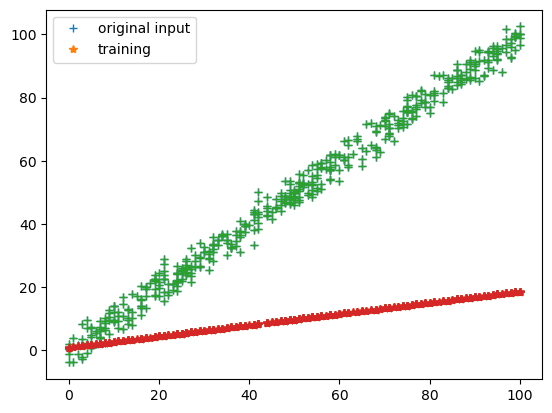

iterations=3,loss=1594.5104273510813


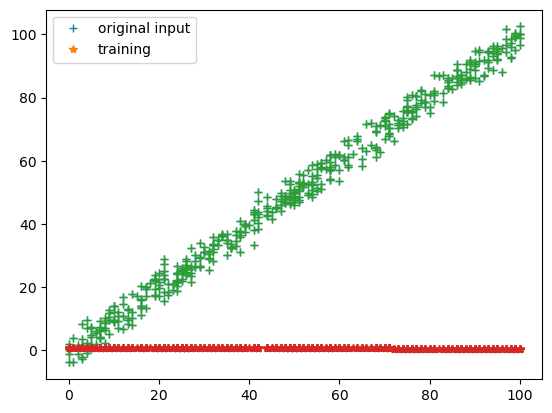

iterations=4,loss=2265.9977569417


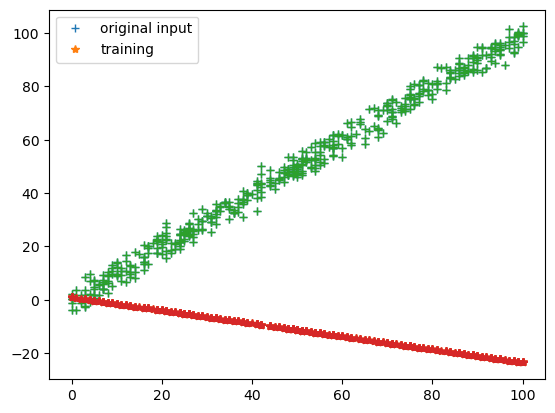

iterations=5,loss=3447.406376071725


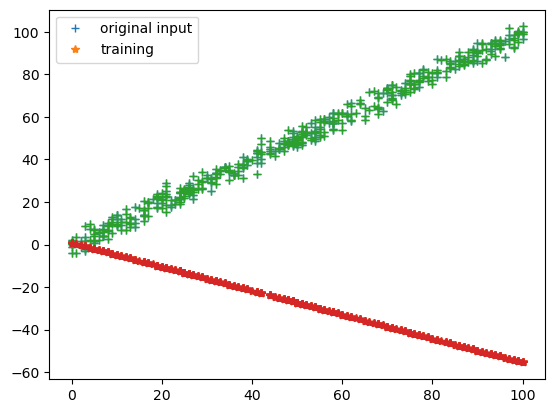

iterations=6,loss=5525.9743663225445


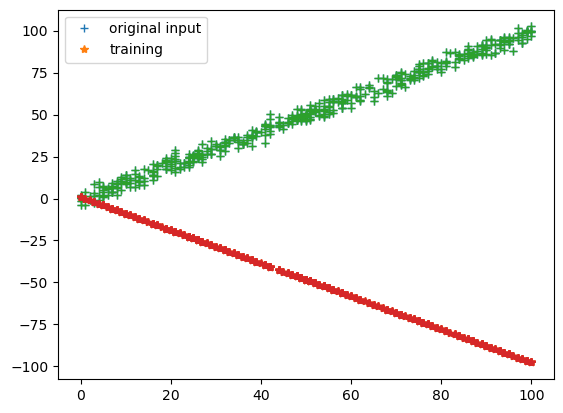

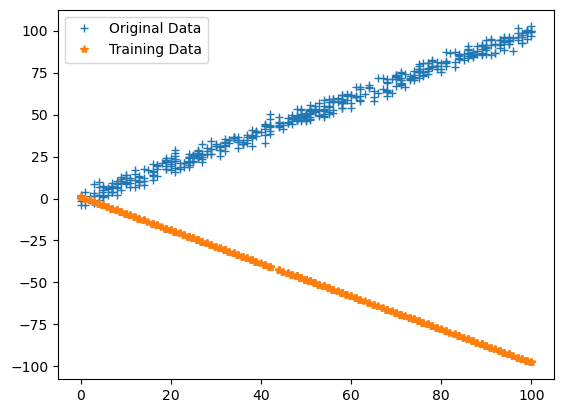

iterations=7,loss=9183.011335847828


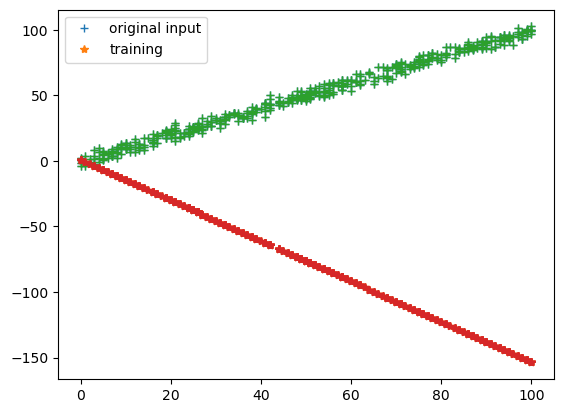

iterations=8,loss=15617.21855975696


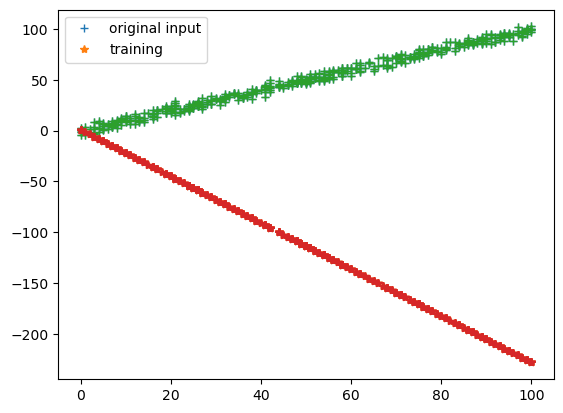

iterations=9,loss=26937.600123347926


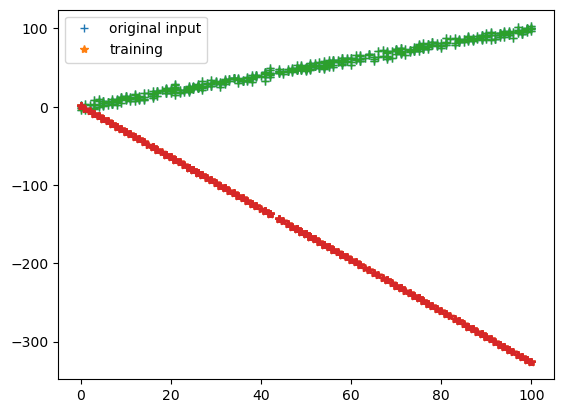

iterations=10,loss=46854.75375781757


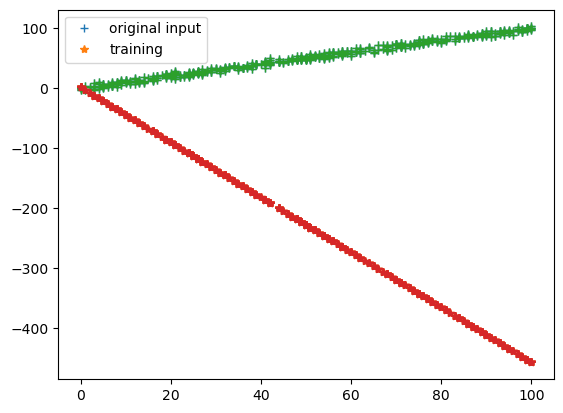

iterations=11,loss=81897.13316258958


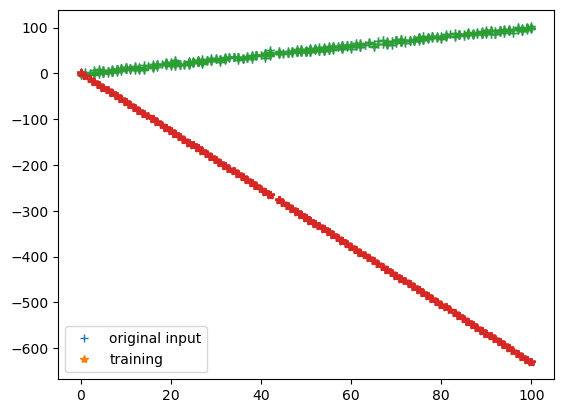

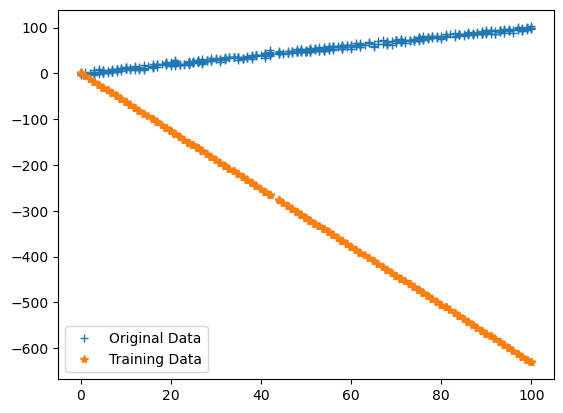

iterations=12,loss=143550.94912984574


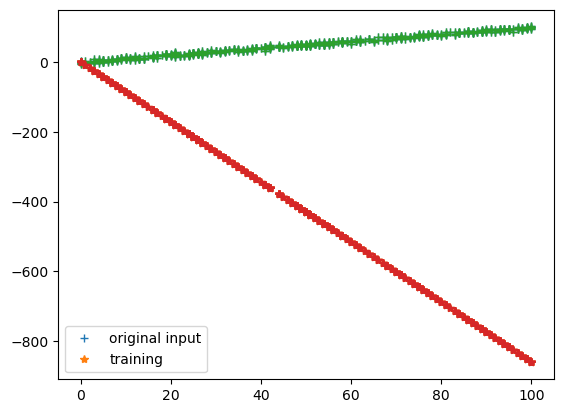

iterations=13,loss=252025.12776012343


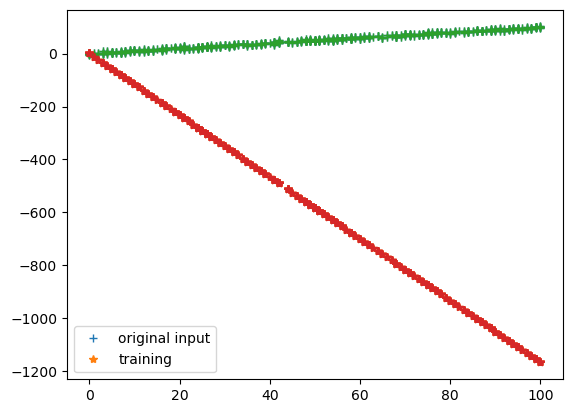

iterations=14,loss=442875.40640894533


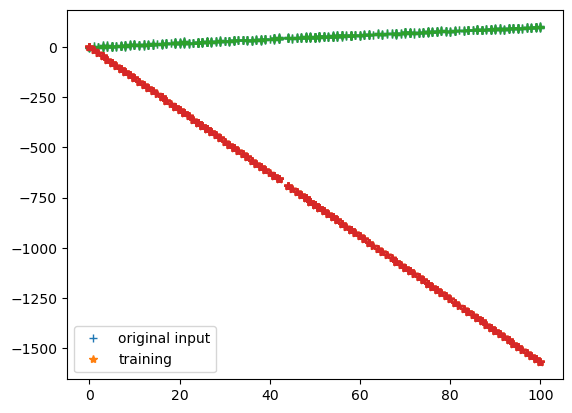

iterations=15,loss=778658.8181717664


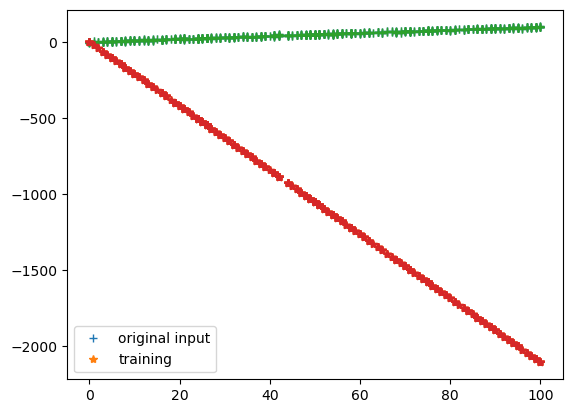

iterations=16,loss=1369438.6799916641


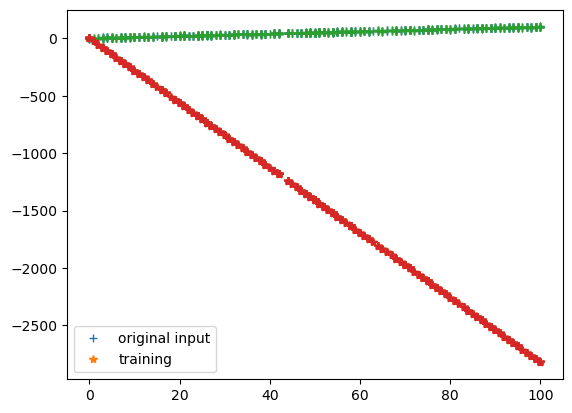

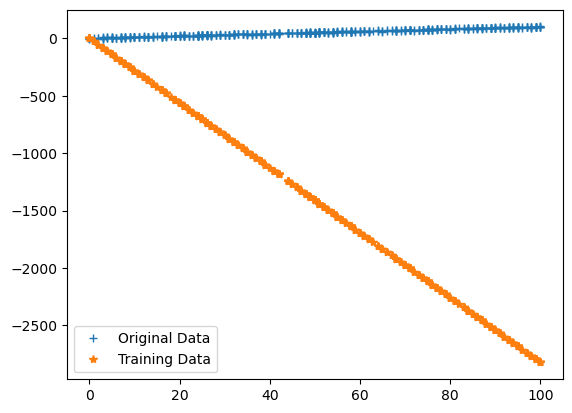

iterations=17,loss=2408861.223748406


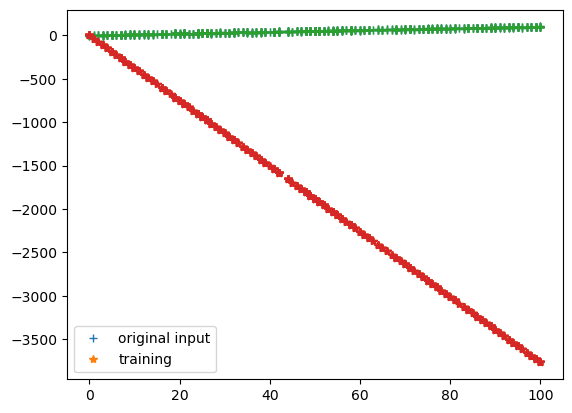

iterations=18,loss=4237629.093726517


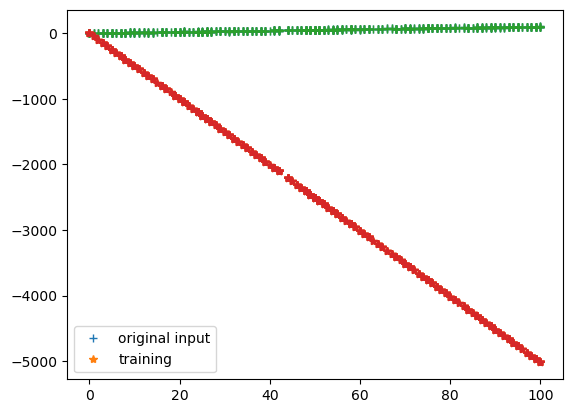

iterations=19,loss=7455177.097903766


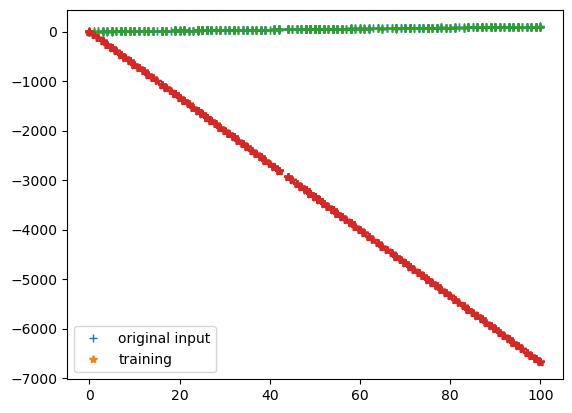

iterations=20,loss=13116155.36900783


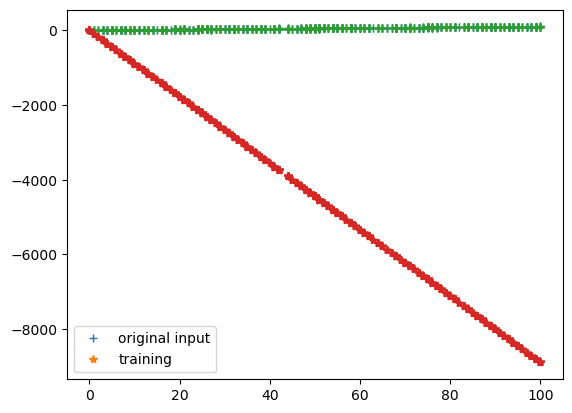

In [125]:

parameters,loss=train(train_input,train_output,0.0001,20)#0.001 is the training rate and 20 is the nu ber of iterations

In [126]:
#parameters,loss=train(train_input,train_output,0.0001,20)

In [127]:
print(parameters)

{'m': -118.15807109722535, 'c': -0.9503085694264466}


In [128]:
loss

[995.9159651020744,
 1212.8486627830707,
 1594.5104273510813,
 2265.9977569417,
 3447.406376071725,
 5525.9743663225445,
 9183.011335847828,
 15617.21855975696,
 26937.600123347926,
 46854.75375781757,
 81897.13316258958,
 143550.94912984574,
 252025.12776012343,
 442875.40640894533,
 778658.8181717664,
 1369438.6799916641,
 2408861.223748406,
 4237629.093726517,
 7455177.097903766,
 13116155.36900783]

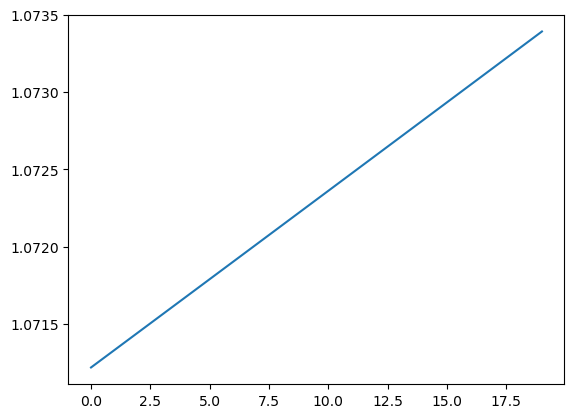

In [98]:
plt.plot(loss)

lets predict

In [99]:
test_pred=test_input*parameters["m"]+parameters["c"]


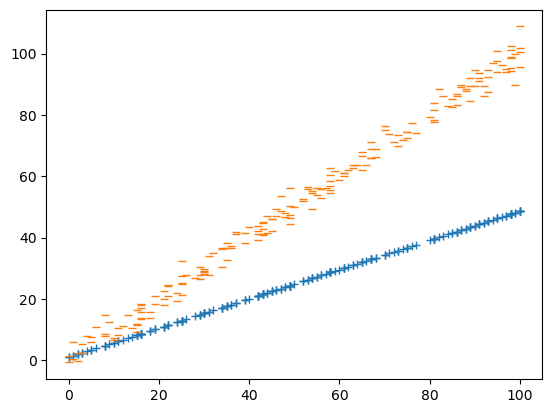

In [100]:
plt.plot(test_input,test_pred,"+")
plt.plot(test_input,test_output,"_")
plt.show()

In [101]:
cost_funtion(test_output,test_pred)

466.66592013097664

In [81]:
## cost can be defined as the error but this error is so heigh this time !!
